Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
heart=pd.read_csv('/content/HeartDisease.csv')

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Uni-Variate Analysis

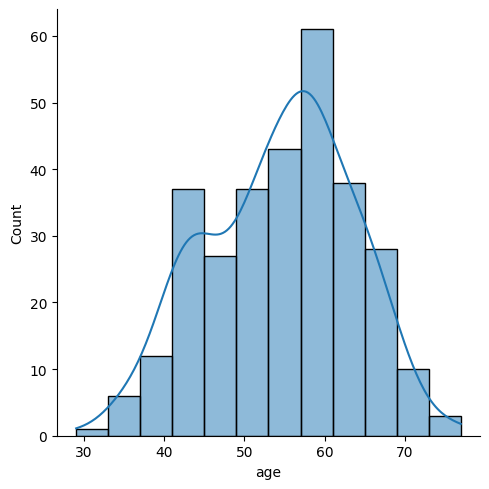

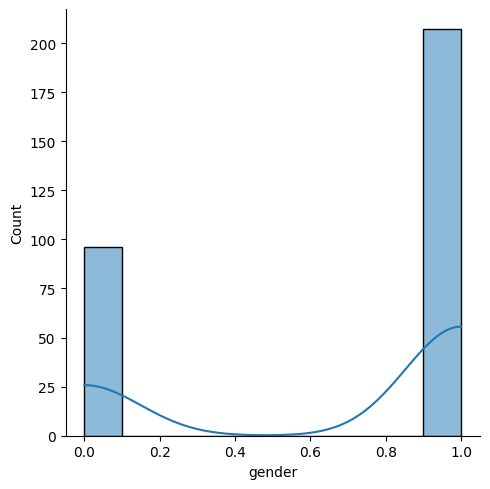

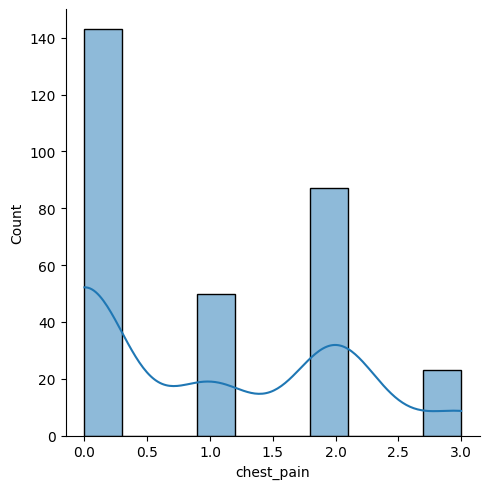

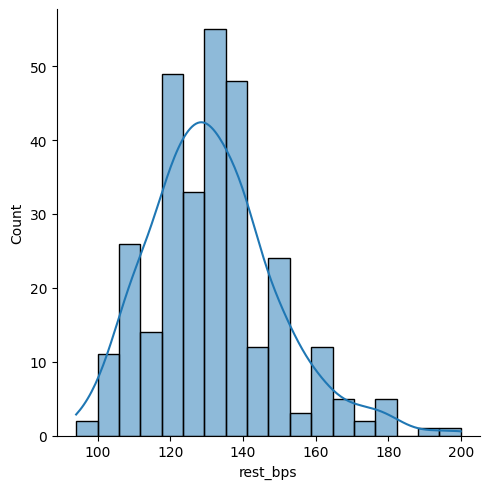

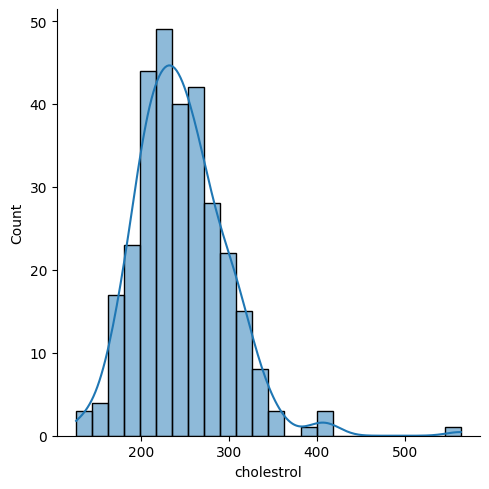

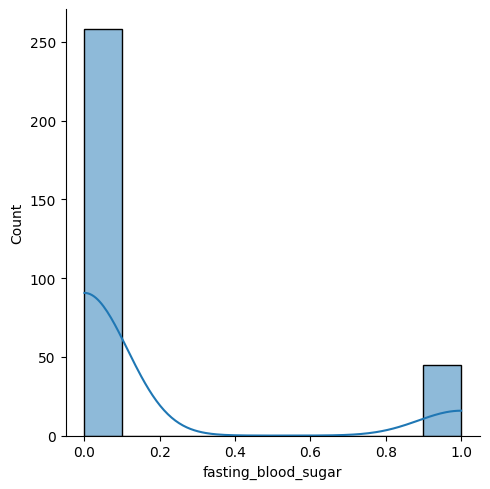

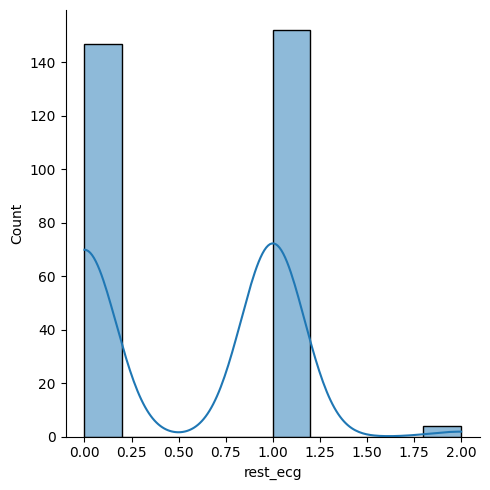

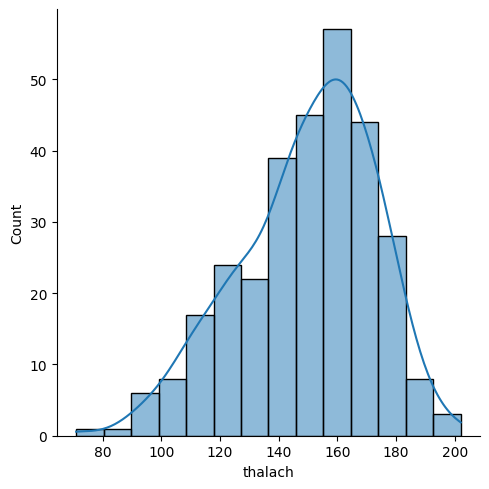

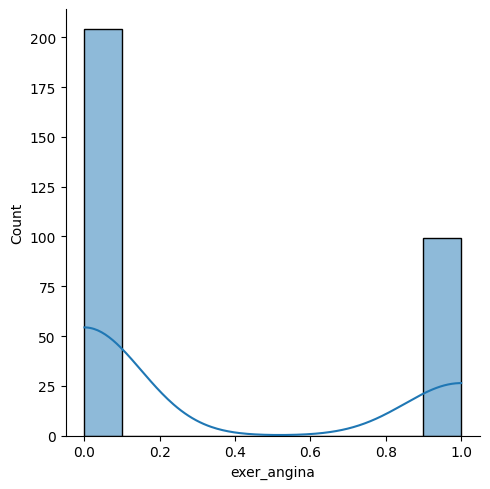

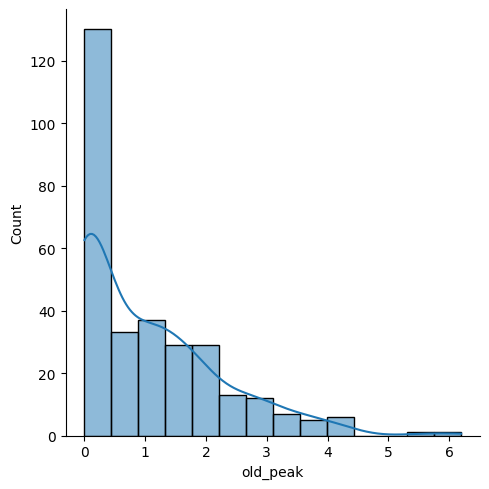

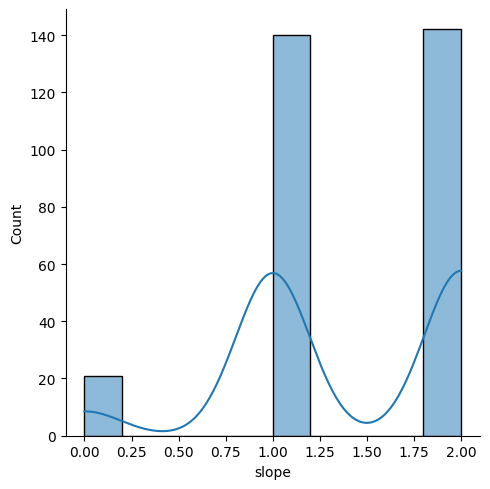

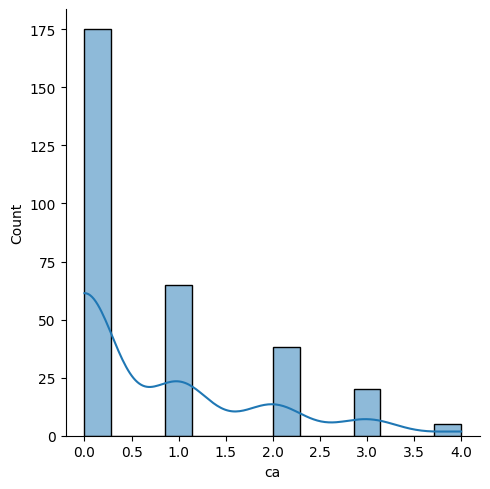

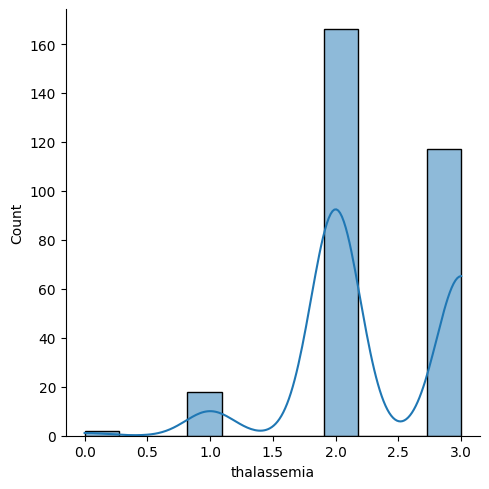

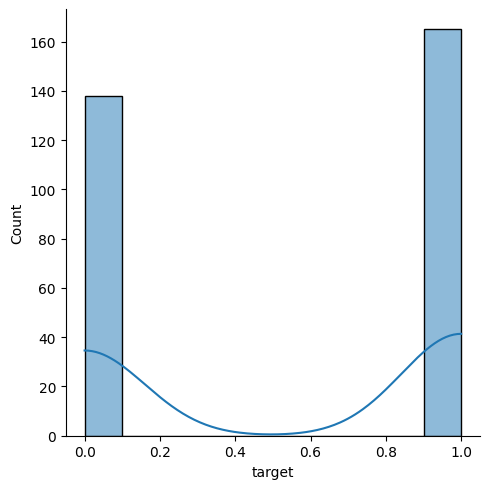

In [ ]:
for i in heart.columns:
  sns.displot(heart[i],kde=True)

Bi-variate Analysis

<Axes: >

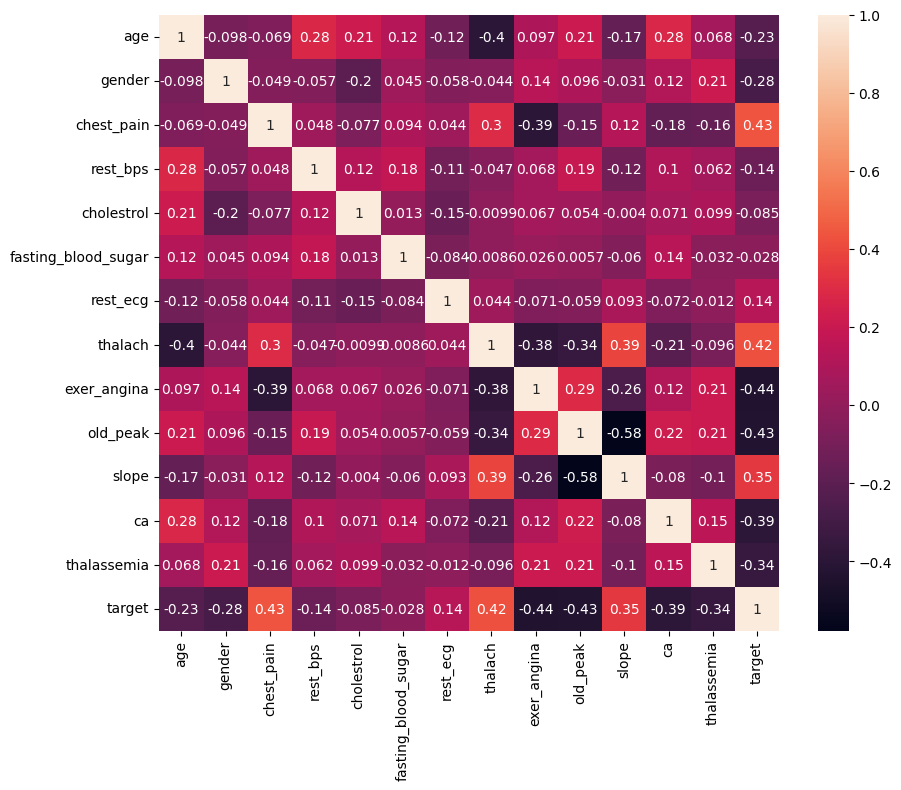

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(heart.corr(),annot=True)

Split into x and y

In [ ]:
x=heart.drop(['target'],axis=1)
y=heart['target']

Train and test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

Decision tree Classifier

In [ ]:
dtree=DecisionTreeClassifier(max_depth=5,min_samples_split=2)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  class_report=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("Accuracy score",round(acc_score,2))
  print(conf_matrix)
  print(class_report)

In [ ]:
model_eval(y_train,y_hat_train_dtree)

Accuracy score 0.94
[[ 96  12]
 [  2 132]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       108
           1       0.92      0.99      0.95       134

    accuracy                           0.94       242
   macro avg       0.95      0.94      0.94       242
weighted avg       0.94      0.94      0.94       242



In [ ]:
model_eval(y_test,y_hat_test_dtree)

Accuracy score 0.74
[[20 10]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

